##CAP 4633C - Fall 2024. Assignment 1

Group 5:

Alberto Diaz

Barbara Lorenzo

Bosco Morales

Robert Rivera

##Introduction




*   This assignment covers the basic ideas about Classification we have discussed so far in class. It also covers Naive Bayes classification and ClassificationTrees.
*   Questions 1 and 2 are challenge questions. They are worth only 5 and 15 points, respectively. Challenge questions are those I want you to try your best to answer without getting any help from me (i.e., you cannot ask me how to answer them). If you do something, you will get points for your answers to these questions, even if they are not completely right (i.e., partial credit is your friend!)
*   Questions 3 and 4 are based on the Cancer dataset part of scikit-learn. To know more about the variables in this dataset, you can visit the following web page: https://scikit-learn.org/stable/datasets/toy_dataset.html

To read this dataset from scikit-learn, run the following statements in your Colab notebook:

```
from sklearn import datasets
cancer_data=datasets.load_breast_cancer()
cancer_df=pd.DataFrame(cancer_data.data, columns= cancer_data.feature_names)
original_target= cancer_data.target
new_target= 1 - original_target
cancer_df['Y']= new_target

```
Now you can use the cancer_df data frame to answer questions 3 and 4. In this dataframe, the last column, Y, is the outcome. The other columns are the predictors. The classes of the outcome variable are 1 for patients with Malignant tumors and 0 for patients with benign tumors.

Note: I strongly advised you to read the dataset using the code I provided you above. If you try to use your own code and get the labels of Y wrong, you will be deducted 15 points for making such an AVOIDABLE mistake. If that situation happens, the explanation for why you lost the 15 points will be to show you this fragment.




In [ ]:
# Import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.inspection import permutation_importance

In [ ]:
# Loading the dataset as instructed
cancer_data=datasets.load_breast_cancer()
cancer_df=pd.DataFrame(cancer_data.data, columns= cancer_data.feature_names)
original_target= cancer_data.target
new_target= 1 - original_target
cancer_df['Y']= new_target

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##Question 1 (5 points)

We have two piles of product X. The probability that one product selected from pile # 1 is defective is 0.2. The probability that one product selected from pile # 2 is defective is 0.1.

###1 a) We inspect an item that was previously drawn from a pile (we do not know which pile) and we notice it is defective. What is the probability it was selected from pile 2? Show all your work.


In [ ]:
# Conditional probabilities
defective_pile_one = 0.2
defective_pile_two = 0.1

# Non-conditional probabilities
item_defective_pile_one = 0.5
item_defective_pile_two = 0.5

# Combined probability of getting a defective item from either pile
combined_probability = (defective_pile_one * item_defective_pile_one) + (defective_pile_two * item_defective_pile_two)

# Use Baye's Theorem to find the probability that a defective item came from pile 2
probability_pile_two_given_defective = (defective_pile_two * item_defective_pile_two) / combined_probability

print("Probability that the defective product came from pile 2:", probability_pile_two_given_defective)

Probability that the defective product came from pile 2: 0.3333333333333333


#### 1a Response

Probability that the defective item came from pile two is 0.33 or 33%







###1 b)  Describe with words what these two statements mean:

P (Defective |  Pile 1)

P (Pile 2 | Non- defective)


####1b  Response

P (Defective |  Pile 1) : The probability that a product is defective given that it comes from pile 1

P (Pile 2 | Non- defective): The probability that the product came from pile 2 given that it is non-defective




##Question 2 (15 points)

(include the answer to this question in the notebook too)

The following figure shows a split done on predictor Xj at a cut off value of a.


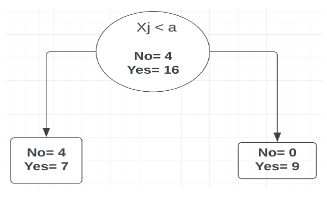

###2 a) Manually compute the error rate of the split (show all your work).

In [ ]:
# Error rate for a split =  Average weighted error

# Average weighted error = (Weight for left node * error rate for left node) + (weight for right node * error rate for right node)
error_left_node = 4/11
weight_left_node = 11/20

weight_right_node = 9/20
error_right_node =0/9

average_weighted_error = (weight_left_node * error_left_node) + (weight_right_node * error_right_node)
print(average_weighted_error)

0.2


#### 2a Response

The error rate for the split is 0.20 or 20%.



###2 a1) Based on the error rate of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.


#### 2a1 Response

If the level of purity of the two child nodes is higher than that of the parent node, then it is beneficial to split the parent node. In this case, the error rate before the split for the parent node, calculated as the proportion of instances of the minority class ("No") over the total instances, is 0.20. After the split, the weighted error rate for the two child nodes also calculates to 0.20. Since the error rate before and after the split is the same, this split does not improve the purity of the nodes. Therefore, splitting is unnecessary as it does not reduce the error rate or increase classification accuracy.

###2 b) Manually compute the entropy of the split (show all your work).  

Do these features coincide with the features you reported in your answer to question 1b? Explain.

**Parent Node**:

No = 4

Yes = 16

Total = 20


**Left Child Node**:

No = 4

Yes = 7

Total = 11

**Right Child Node**:

No  =0

Yes = 9

Total = 9


Weighted Entropy = ( Total items/ Number of items in left node ) × Entropy of left node + ( Total items / Number of items in right node ) × Entropy of right node

In [ ]:
# Entropy calculation for Parent Node
parent_p0 = (4 / 20)  # proportion of "No"
parent_p1 = (16 / 20)  # proportion of "Yes"

entropy_parent = -((1 - parent_p1) * np.log2(1 - parent_p1)) - (parent_p1 * np.log2(parent_p1))

print("Entropy of Parent Node:", entropy_parent)

Entropy of Parent Node: 0.7219280948873623


In [ ]:
# Entropy calculation for Left Child Node
left_p0 = (4 / 11)  # proportion of "No"
left_p1 = (7 / 11)  # proportion of "Yes"

entropy_left = -((1 - left_p1) * np.log2(1 - left_p1)) - (left_p1 * np.log2(left_p1))

print("Entropy of Left Child Node:", entropy_left)

Entropy of Left Child Node: 0.9456603046006401


In [ ]:
# Entropy calculation for Right Child Node
right_p0 = 0 / 9  # proportion of "No"
right_p1 = 9 / 9  # proportion of "Yes"

# Since the right node is completely pure, the right enthropy is 0

# entropy_right = -((1 - right_p1) * log(1 - right_p1)) - (right_p1 * log(right_p1))
# entropy_right = -((1 - 9/9) * log(1 - 9/9)) - (9/9 * log(9/9))
# entropy_right = -((0) * log(0)) - (1 * log(1))
# entropy_right = (0) - (0)
entropy_right = 0

print("Entropy of Right Child Node:", entropy_right)

Entropy of Right Child Node: 0


In [ ]:
# Calculate the weighted entropy

weighted_entropy = ((11 / 20) * entropy_left) + ((9 / 20) * entropy_right)
print("Weighted Entropy:", weighted_entropy)

Weighted Entropy: 0.5201131675303521


#### 2b Response

The weighted Entropy is 0.5201131675303521 or 0.52



###2 b1) Based on the entropy of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.


#### 2b1 Response

Since the entropy of the **split** (0.52) is lower than the entropy of the **unsplit parent node** (0.72), splitting the node reduces impurity. Based on the entropy, it would be beneficial to split the node into two child nodes, as it leads to a purer classification. The lower the entropy value, the purer the node.


##Question 3 (50 points)

Obtain a classification tree to estimate the outcome variable in the Cancer dataset. Use the post-pruning strategy based on cost-complexity pruning via cross-validation.

Consider the following requirements before applying the post-pruning strategy:

*   You MUST use the exact same steps and code that we learned in class. If you do something differently, your question will be marked wrong with the following message: “Intentionally failed to adhere to instructions”.
*   Split the data into 80% training and 20% testing.
*   Use Entropy as the criterion to grow the tree.

In [ ]:
# Predictors
x_cancer = cancer_df.drop ('Y', axis=1)

In [ ]:
# Outcome
y_cancer = cancer_df['Y']

In [ ]:
# Data split 80/20
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split (x_cancer, y_cancer, test_size= 0.2, random_state= 1)

In [ ]:
# Unprunned tree with Enthropy
tree_cancer_unpruned = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
tree_cancer_unpruned.fit(x_train_cancer , y_train_cancer)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
# Cost Complexity Prunning
ccp_path_cancer = tree_cancer_unpruned.cost_complexity_pruning_path(x_train_cancer, y_train_cancer)

In [ ]:
hyperparam_grid_alpha_cancer = { 'ccp_alpha': ccp_path_cancer.ccp_alphas}

In [ ]:
# Cross Validation Object
cv_object_cancer = KFold (n_splits= 10 , shuffle= True, random_state= 1)

In [ ]:
gridSearch_alpha_cancer = GridSearchCV(tree_cancer_unpruned, hyperparam_grid_alpha_cancer,  cv= cv_object_cancer , scoring='accuracy', n_jobs= -1)

In [ ]:
gridSearch_alpha_cancer.fit(x_train_cancer, y_train_cancer)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.0060547 , 0.0060547 , 0.00713212, 0.00820953,
       0.00879121, 0.0116038 , 0.01327878, 0.01330655, 0.01464224,
       0.01605048, 0.01699471, 0.02510488, 0.03873803, 0.05162636,
       0.10507124, 0.61075655])},
             scoring='accuracy')

In [ ]:
print('The best parameters are: ', gridSearch_alpha_cancer.best_params_)

The best parameters are:  {'ccp_alpha': 0.008209532952768338}


In [ ]:
tree_cancer_postpruned =  DecisionTreeClassifier(criterion='entropy', random_state=1, ccp_alpha= gridSearch_alpha_cancer.best_params_['ccp_alpha'])

In [ ]:
tree_cancer_postpruned.fit(x_train_cancer, y_train_cancer)

DecisionTreeClassifier(ccp_alpha=0.008209532952768338, criterion='entropy',
                       random_state=1)

In [ ]:
y_predicted_postprunned_cancer = tree_cancer_postpruned.predict(x_test_cancer)

In [ ]:
confusion_matrix (y_test_cancer, y_predicted_postprunned_cancer)

array([[72,  0],
       [ 6, 36]])

In [ ]:
print (classification_report (y_test_cancer, y_predicted_postprunned_cancer))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



###3 a) Obtain the tree on the training data and show its figure. Use the figure of the tree to answer these two questions:

From the rightmost leaf in the tree:


*   Report the number of observations that reached it.
*   What’s the prediction of Y for the samples that reached it? JUSTIFY how you came up with your prediction.

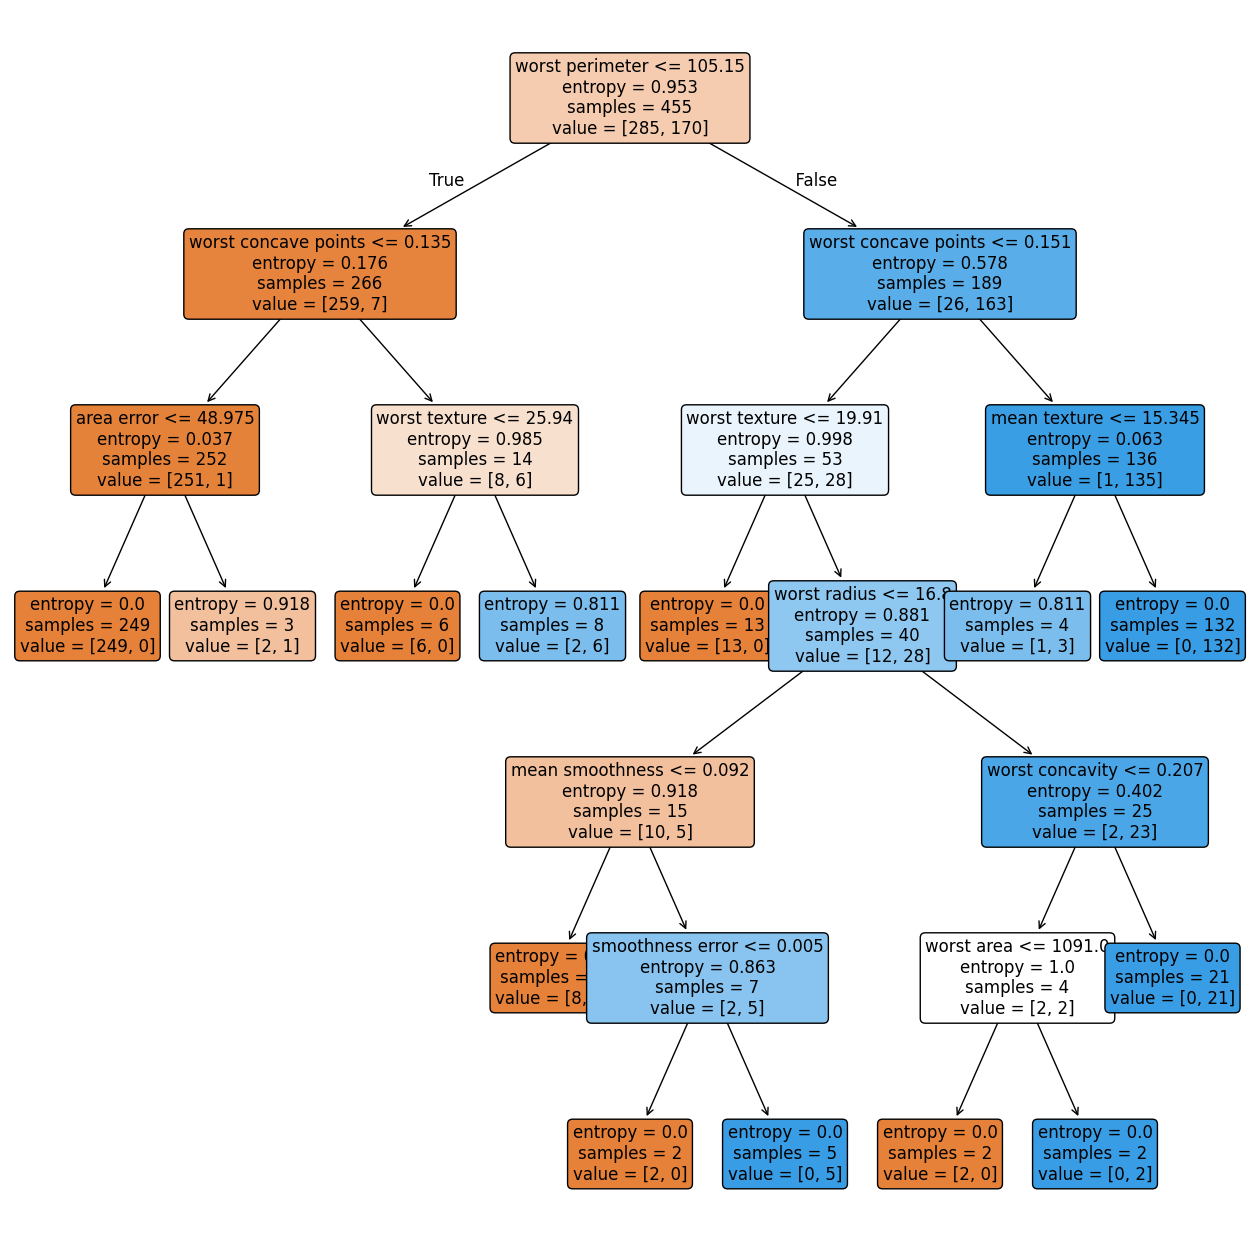

In [ ]:
plt.figure(figsize=(16,16))
tree.plot_tree(tree_cancer_postpruned,filled=True, rounded = True, feature_names = x_train_cancer.columns, fontsize=12)
plt.show()

#### 3a Response
According to the tree, there are 132 observations/instances in the right-most leaf.

The prediction is class "1" because every sample that reached this node is of class "1" (indicated by "Value = [0, 132]"). Additionally, the entropy at this node is 0.0, indicating perfect purity. This means there is no uncertainty, and all samples belong to a single class (class "1").


###3 b) Report the test prediction error rate of the tree that you obtained.

In [ ]:
print (classification_report (y_test_cancer, y_predicted_postprunned_cancer))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 3b Response
According to the classification report, the accuracy of the model is 0.95 or 95%, which means that the model correctly classified 95% of the test samples. Therefore, the test prediction error rate is 1 − 0.95 = 0.05 or 5%. This error rate represents the proportion of test samples that were misclassified by the model.


###3 c) If you applied the tree to predict the cancer status of 350 new people that we know to have a malignant tumor, how many of them do you expect the tree to correctly classify? Justify by showing how you got your answer.

In [ ]:
recall_cancer_postpruned = 0.86 #Recall score of malignant cases
new_cases = 350 # Number of new cases
new_predicted_cases = new_cases * recall_cancer_postpruned
print('The tree correctly classified: ', new_predicted_cases, "new cases")

The tree correctly classified:  301.0 new cases


#### 3c Response
If you apply the decision tree model to predict the cancer status of 350 new people known to have malignant tumors, you would expect it to correctly classify 301 of them as malignant. This is calculated by multiplying the total number of malignant cases (350) by the model's recall for the malignant class (0.86 or 86%).

###3 d) What’s the precision of the tree (in %) for the Malignant class? Explain how you got your answer.

In [ ]:
print (classification_report (y_test_cancer, y_predicted_postprunned_cancer))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 3d Response

According to the classification report, the precision of the tree for the Malignant class is 1.00 or 100%.

###3 e) Report the area under the ROC curve. Show your work.

In [ ]:
roc_cancer_postpruned= roc_auc_score(y_test_cancer, tree_cancer_postpruned.predict_proba(x_test_cancer)[:, 1])

In [ ]:
np.round (roc_cancer_postpruned, 3)

0.94

#### 3e Response

The area under the ROC curve is 0.94

##Question 4 (30 points)

Use the same training-test split you used in question 3 to answer this question. Apply Naive Bayes classification.

In [ ]:
nb_classifier_cancer = GaussianNB()

In [ ]:
nb_classifier_cancer.fit(x_train_cancer, y_train_cancer)

GaussianNB()

In [ ]:
y_predicted_test_cancer = nb_classifier_cancer.predict(x_test_cancer)

In [ ]:
confusion_matrix(y_test_cancer, y_predicted_test_cancer)

array([[70,  2],
       [ 4, 38]])

In [ ]:
print (classification_report (y_test_cancer, y_predicted_test_cancer))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



###4 a) Report the area under the ROC curve. Show your work. Use this metric to compare the Naive Bayes classifier with the Tree from question 3. Justify your answer (i.e., justify your comparison).

In [ ]:
roc_auc_nb_cancer = roc_auc_score(y_test_cancer, nb_classifier_cancer.predict_proba(x_test_cancer)[:, 1])

In [ ]:
# Area under the ROC curve

np.round (roc_auc_nb_cancer, 3)

0.977

#### 4a Response

The AUC for the Naive Bayes classifier is 0.97, whereas the AUC for the decision tree model (entropy-based) is 0.94. Since AUC values range from 0 to 1, with 1 indicating perfect classification, the Naive Bayes classifier is closer to this ideal value. An AUC of 0.97 suggests that the Naive Bayes model has a higher ability to correctly classify malignant and benign cases across different thresholds compared to the decision tree.

###4 b) Report the value of a metric (i.e, ONE metric only) that combines information about the Precision and Sensitivity of the classifier relative to the Malignant class. Of course, do NOT only report the value of the metric but also the name of the metric.

In [ ]:
print (classification_report (y_test_cancer, y_predicted_test_cancer))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 4b Response

F1-Score for malignant (class 1) = 0.93

This combines information about both Precision and Recall for the Malignant class.

###4 c) If you applied this classifier to predict the cancer status of 400 new people, how many of them do you expect the classifier to classify incorrectly? Justify by showing your work.

In [ ]:
accuracy = 0.95
error_rate = 1 - accuracy
new_cases = 400 # Number of new cases
new_predicted_cases_nb = new_cases * error_rate
print('The tree misclassified : ', round(new_predicted_cases_nb, 2), "new cases")

The tree misclassified :  20.0 new cases


#### 4c Response

If you apply the Naive Bayes model to predict the cancer status of 400 new people, you would expect it to incorrectly classify 20 of them. This is calculated by multiplying the total number of cases by the model's error rate (1 minus Accuracy).